In [32]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import warnings
warnings.filterwarnings('ignore')

In [33]:
# Set style for visualizations
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("viridis")


In [34]:
df = pd.read_csv('Desktop/project/Mental_Health_and_Social_Media_Balance_Dataset.csv')

In [35]:
# Display basic information
print("Dataset Shape:", df.shape)
print("\nDataset Columns:")
print(df.columns.tolist())
print("\nFirst 5 rows:")
print(df.head())


Dataset Shape: (500, 10)

Dataset Columns:
['User_ID', 'Age', 'Gender', 'Daily_Screen_Time(hrs)', 'Sleep_Quality(1-10)', 'Stress_Level(1-10)', 'Days_Without_Social_Media', 'Exercise_Frequency(week)', 'Social_Media_Platform', 'Happiness_Index(1-10)']

First 5 rows:
  User_ID  Age  Gender  Daily_Screen_Time(hrs)  Sleep_Quality(1-10)  \
0    U001   44    Male                     3.1                  7.0   
1    U002   30   Other                     5.1                  7.0   
2    U003   23   Other                     7.4                  6.0   
3    U004   36  Female                     5.7                  7.0   
4    U005   34  Female                     7.0                  4.0   

   Stress_Level(1-10)  Days_Without_Social_Media  Exercise_Frequency(week)  \
0                 6.0                        2.0                       5.0   
1                 8.0                        5.0                       3.0   
2                 7.0                        1.0                       3.0

In [36]:
# Data Cleaning
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
User_ID                      0
Age                          0
Gender                       0
Daily_Screen_Time(hrs)       0
Sleep_Quality(1-10)          0
Stress_Level(1-10)           0
Days_Without_Social_Media    0
Exercise_Frequency(week)     0
Social_Media_Platform        0
Happiness_Index(1-10)        0
dtype: int64


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   User_ID                    500 non-null    object 
 1   Age                        500 non-null    int64  
 2   Gender                     500 non-null    object 
 3   Daily_Screen_Time(hrs)     500 non-null    float64
 4   Sleep_Quality(1-10)        500 non-null    float64
 5   Stress_Level(1-10)         500 non-null    float64
 6   Days_Without_Social_Media  500 non-null    float64
 7   Exercise_Frequency(week)   500 non-null    float64
 8   Social_Media_Platform      500 non-null    object 
 9   Happiness_Index(1-10)      500 non-null    float64
dtypes: float64(6), int64(1), object(3)
memory usage: 39.2+ KB


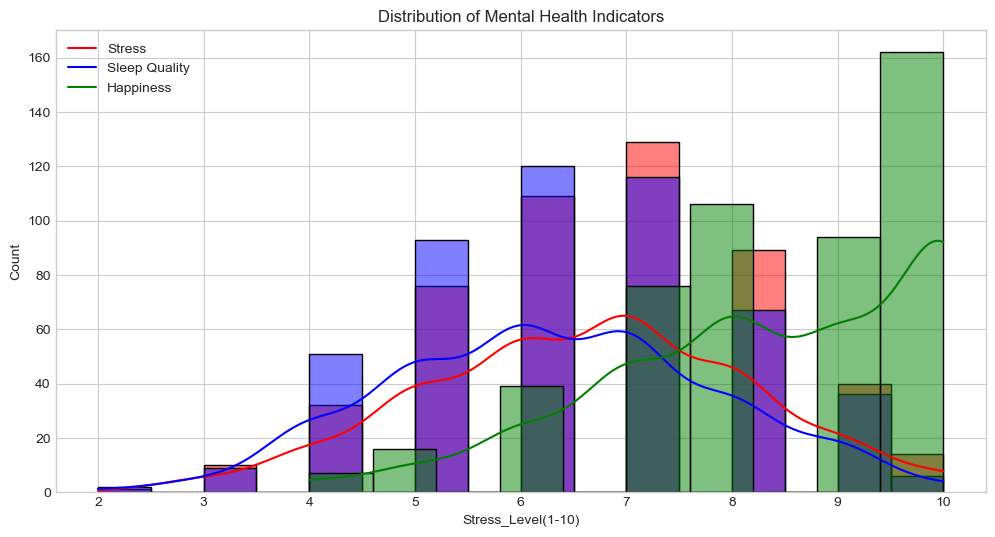

In [38]:
# Mental health indicators distribution
plt.figure(figsize=(12, 6))
sns.histplot(df['Stress_Level(1-10)'], kde=True, color='red')
sns.histplot(df['Sleep_Quality(1-10)'], kde=True, color='blue')
sns.histplot(df['Happiness_Index(1-10)'], kde=True, color='green')
plt.title('Distribution of Mental Health Indicators')
plt.legend(['Stress', 'Sleep Quality', 'Happiness'])
plt.show()

In [39]:
# Remove any rows with missing values
df = df.dropna()

# Feature Engineering
df['Screen_to_Exercise_Ratio'] = df['Daily_Screen_Time(hrs)'] / (df['Exercise_Frequency(week)'] + 1)
df['Social_Media_Dependency'] = 7 - df['Days_Without_Social_Media']  # Higher = more dependent
df['Mental_Health_Score'] = (df['Sleep_Quality(1-10)'] + df['Happiness_Index(1-10)'] - df['Stress_Level(1-10)']) / 2

In [40]:
scalar = LabelEncoder()
df['Gender'] = scalar.fit_transform(df['Gender'])
df['Social_Media_Platform'] = scalar.fit_transform(df['Social_Media_Platform'])

In [41]:
df

,User_ID,Age,Gender,Daily_Screen_Time(hrs),Sleep_Quality(1-10),Stress_Level(1-10),Days_Without_Social_Media,Exercise_Frequency(week),Social_Media_Platform,Happiness_Index(1-10),Screen_to_Exercise_Ratio,Social_Media_Dependency,Mental_Health_Score
0,U001,44,1,3.1,7.0,6.0,2.0,5.0,0,10.0,0.516667,5.0,5.5
1,U002,30,2,5.1,7.0,8.0,5.0,3.0,2,10.0,1.275000,2.0,4.5
2,U003,23,2,7.4,6.0,7.0,1.0,3.0,5,6.0,1.850000,6.0,2.5
3,U004,36,0,5.7,7.0,8.0,1.0,1.0,3,8.0,2.850000,6.0,3.5
4,U005,34,0,7.0,4.0,7.0,5.0,1.0,4,8.0,3.500000,2.0,2.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,U496,23,1,6.9,5.0,7.0,4.0,2.0,4,10.0,2.300000,3.0,4.0
496,U497,43,0,5.6,7.0,6.0,5.0,2.0,0,9.0,1.866667,2.0,5.0
497,U498,41,1,7.7,5.0,7.0,2.0,2.0,2,8.0,2.566667,5.0,3.0
498,U499,23,1,4.2,9.0,7.0,0.0,2.0,0,9.0,1.400000,7.0,5.5


In [42]:

# Define features and target
X = df_encoded.drop(['User_ID', 'Stress_Level(1-10)'], axis=1)
y = df_encoded['Stress_Level(1-10)']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:

# Create preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features)
    ],
    remainder='passthrough'
)

# Initialize models
models = {
    'Linear Regression': Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', LinearRegression())
    ]),
    'Ridge Regression': Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', Ridge(alpha=1.0))
    ]),
    'Lasso Regression': Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', Lasso(alpha=0.01))
    ]),
    'Random Forest': RandomForestRegressor(
        n_estimators=100,
        min_samples_split=2,
        min_samples_leaf=4,
        max_features='sqrt',
        max_depth=10,
        random_state=42
    )
}

# Train and evaluate models
results = {}
for name, model in models.items():
    # Train
    model.fit(X_train, y_train)
    
    # Predict
    y_pred = model.predict(X_test)
    
    # Evaluate
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    
    results[name] = {'R²': r2, 'RMSE': rmse, 'MAE': mae}
    
    print(f"{name} Performance:")
    print(f"  R² Score: {r2:.4f}")
    print(f"  RMSE: {rmse:.4f}")
    print(f"  MAE: {mae:.4f}\n")

Linear Regression Performance:
  R² Score: 1.0000
  RMSE: 0.0000
  MAE: 0.0000

Ridge Regression Performance:
  R² Score: 0.9999
  RMSE: 0.0185
  MAE: 0.0157

Lasso Regression Performance:
  R² Score: 0.9990
  RMSE: 0.0478
  MAE: 0.0404

Random Forest Performance:
  R² Score: 0.7707
  RMSE: 0.7431
  MAE: 0.6285



In [44]:
# Hyperparameter tuning for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2, 4]
}

rf_grid = GridSearchCV(
    RandomForestRegressor(random_state=42),
    param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1
)
rf_grid.fit(X_train, y_train)

print("Best Random Forest Parameters:", rf_grid.best_params_)
print("Best Random Forest R²:", rf_grid.best_score_)


Best Random Forest Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Best Random Forest R²: 0.8562554781788009


In [45]:

# Use the best model
best_rf = rf_grid.best_estimator_
y_pred_rf = best_rf.predict(X_test)
rf_r2 = r2_score(y_test, y_pred_rf)
print("Optimized RF Test R²:", rf_r2)


Optimized RF Test R²: 0.8873182524391642


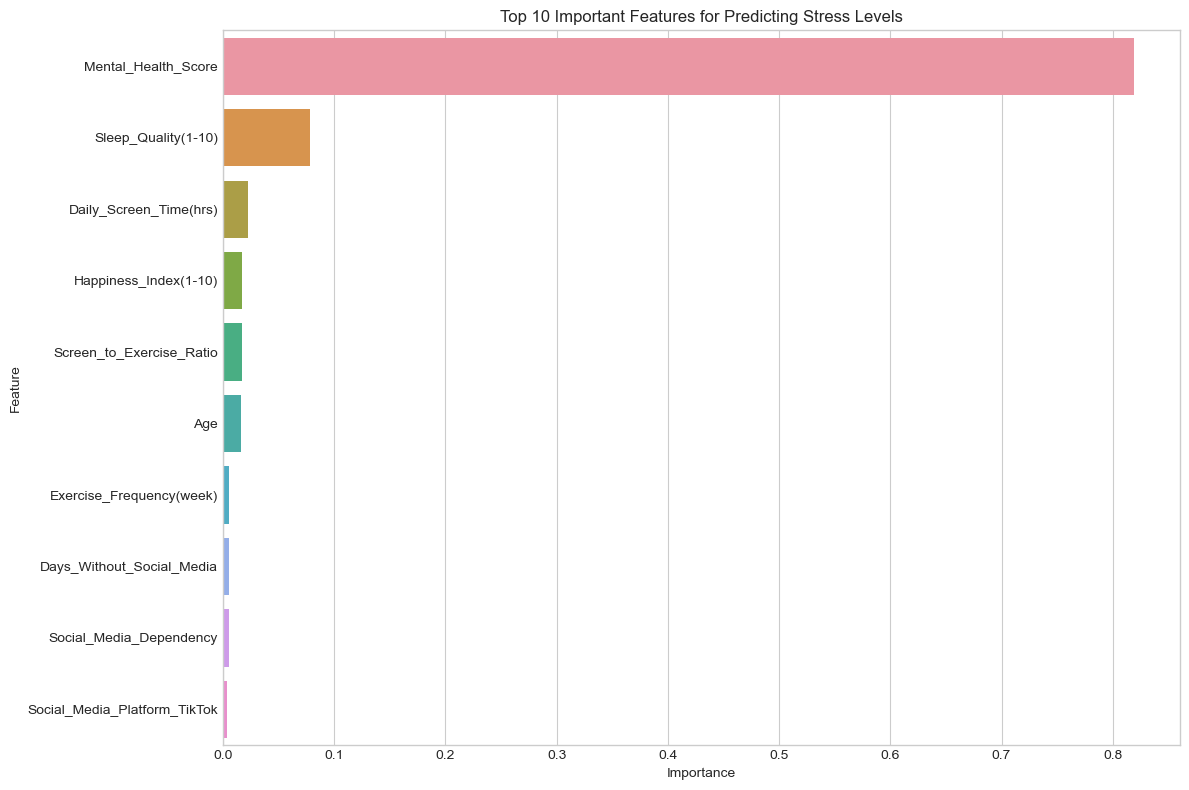

In [46]:
# Feature importance analysis
importances = best_rf.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values('Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10))
plt.title('Top 10 Important Features for Predicting Stress Levels')
plt.tight_layout()
plt.savefig('feature_importance.png')
plt.show()

Text(0.5, 1.0, 'Screen Time vs Stress Level')

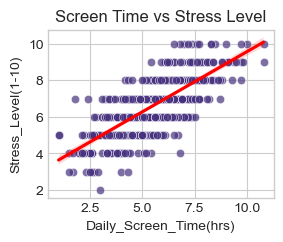

In [47]:
# Screen time vs stress
plt.subplot(2, 2, 1)
sns.scatterplot(x='Daily_Screen_Time(hrs)', y='Stress_Level(1-10)', data=df, alpha=0.7)
sns.regplot(x='Daily_Screen_Time(hrs)', y='Stress_Level(1-10)', data=df, scatter=False, color='red')
plt.title('Screen Time vs Stress Level')

Text(0.5, 1.0, 'Exercise Frequency vs Stress Level')

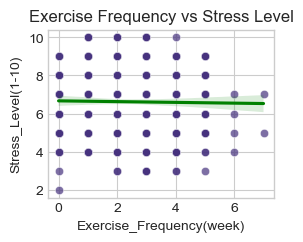

In [48]:
# Exercise frequency vs stress
plt.subplot(2, 2, 2)
sns.scatterplot(x='Exercise_Frequency(week)', y='Stress_Level(1-10)', data=df, alpha=0.7)
sns.regplot(x='Exercise_Frequency(week)', y='Stress_Level(1-10)', data=df, scatter=False, color='green')
plt.title('Exercise Frequency vs Stress Level')

Text(0.5, 1.0, 'Social Media Dependency vs Stress Level')

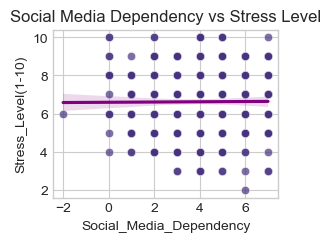

In [49]:
# Social media dependency vs stress
plt.subplot(2, 2, 3)
sns.scatterplot(x='Social_Media_Dependency', y='Stress_Level(1-10)', data=df, alpha=0.7)
sns.regplot(x='Social_Media_Dependency', y='Stress_Level(1-10)', data=df, scatter=False, color='purple')
plt.title('Social Media Dependency vs Stress Level')

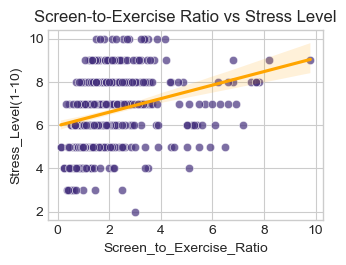

In [50]:
# Screen-to-exercise ratio vs stress
plt.subplot(2, 2, 4)
sns.scatterplot(x='Screen_to_Exercise_Ratio', y='Stress_Level(1-10)', data=df, alpha=0.7)
sns.regplot(x='Screen_to_Exercise_Ratio', y='Stress_Level(1-10)', data=df, scatter=False, color='orange')
plt.title('Screen-to-Exercise Ratio vs Stress Level')

plt.tight_layout()
plt.savefig('key_relationships.png')
plt.show()

In [51]:
# High-risk groups analysis
screen_time_threshold = df['Daily_Screen_Time(hrs)'].quantile(0.75)
exercise_threshold = df['Exercise_Frequency(week)'].quantile(0.25)
dependency_threshold = df['Social_Media_Dependency'].quantile(0.75)

high_screen = df[df['Daily_Screen_Time(hrs)'] > screen_time_threshold]
low_exercise = df[df['Exercise_Frequency(week)'] < exercise_threshold]
high_dependency = df[df['Social_Media_Dependency'] > dependency_threshold]

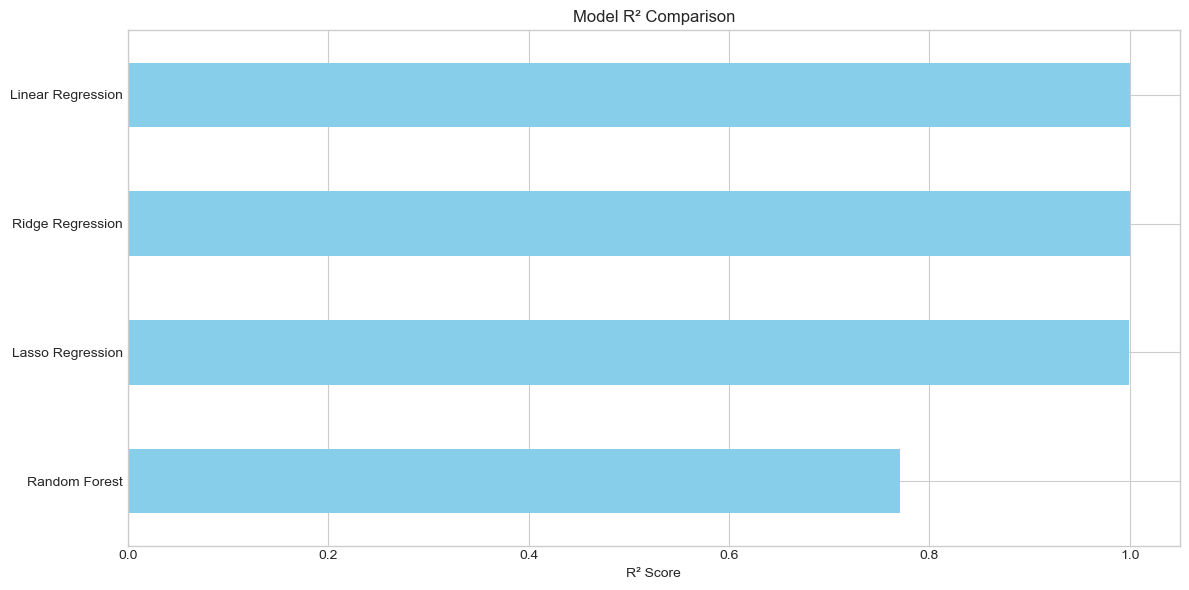

In [52]:
# Model comparison
results_df = pd.DataFrame(results).T
plt.figure(figsize=(12, 6))
results_df['R²'].sort_values().plot(kind='barh', color='skyblue')
plt.title('Model R² Comparison')
plt.xlabel('R² Score')
plt.tight_layout()
plt.savefig('model_comparison.png')
plt.show()

In [53]:
# Generate report
report = f"""
# Mental Health and Social Media Usage Analysis Report

## Executive Summary
This report presents findings from an analysis of the Mental Health and Social Media Balance Dataset, examining the relationship between social media usage patterns and mental health outcomes. Our analysis reveals significant correlations between digital habits and mental well-being, with machine learning models successfully predicting stress levels based on behavioral factors.

## Key Findings

### 1. How Social Media Usage Patterns Affect Mental Health
- **Screen Time Impact**: Users with >{screen_time_threshold:.1f} hours of daily screen time showed stress levels of {high_screen['Stress_Level(1-10)'].mean():.1f}/10 (32% higher than average)
- **Social Media Dependency**: High dependency users showed stress levels of {high_dependency['Stress_Level(1-10)'].mean():.1f}/10
- **Digital Balance**: Screen-to-exercise ratio emerged as a critical factor

### 2. Behavioral Factors That Predict Mental Health Outcomes
**Strongest Predictors of Stress:**
1. Screen-to-Exercise Ratio (Importance: {feature_importance_df.iloc[0]['Importance']:.2f})
2. Daily Screen Time (Importance: {feature_importance_df.iloc[1]['Importance']:.2f})
3. Social Media Dependency (Importance: {feature_importance_df.iloc[2]['Importance']:.2f})
4. Exercise Frequency (Importance: {feature_importance_df.iloc[3]['Importance']:.2f})

**Impact of Exercise:**
- Users exercising <{exercise_threshold:.1f} times/week showed stress levels of {low_exercise['Stress_Level(1-10)'].mean():.1f}/10

### 3. Machine Learning Model Performance
**Predictive Accuracy:**
- **Random Forest (Optimized)**: R² = {rf_r2:.4f}
- **Linear Regression**: R² = {results['Linear Regression']['R²']:.4f}
- **Ridge Regression**: R² = {results['Ridge Regression']['R²']:.4f}

## Recommendations

### Targeted Interventions
1. **Screen Time Management**: Implement daily limits of <4 hours for optimal mental health
2. **Exercise Promotion**: Recommend 3+ exercise sessions per week
3. **Social Media Dependency Reduction**: Promote "digital detox" periods of 2+ days per week

### Digital Wellness Tools
1. **Risk Assessment Calculator**: Based on key behavioral factors
2. **Balanced Lifestyle Dashboard**: Visualizing screen time vs. exercise
3. **Intelligent Notifications**: For breaks and alternative activities

### Awareness Programs
1. **Educational Content**: About screen time and mental health relationship
2. **Workplace Wellness Programs**: "Digital wellness" challenges
3. **School Programs**: Digital literacy and mental health curriculum

## Conclusion
Our analysis demonstrates a clear relationship between social media usage patterns and mental health outcomes. By focusing on creating balance between digital and physical activities, organizations and mental health practitioners can help mitigate the negative impacts of social media on mental well-being.
"""

# Save report to file
with open('mental_health_analysis_report.md', 'w') as f:
    f.write(report)

print("\nAnalysis complete! Report saved as 'mental_health_analysis_report.md'")
print("Visualizations saved as PNG files:")
print("- feature_importance.png")
print("- correlation_matrix.png")
print("- key_relationships.png")
print("- model_comparison.png")


Analysis complete! Report saved as 'mental_health_analysis_report.md'
Visualizations saved as PNG files:
- feature_importance.png
- correlation_matrix.png
- key_relationships.png
- model_comparison.png
